Index(['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',
       'PhysicalActivity', 'AlcoholConsumption', 'Diet', 'StressLevel',
       'Ethnicity', 'Income', 'EducationLevel', 'Medication', 'ChestPainType',
       'ECGResults', 'MaxHeartRate', 'ST_Depression', 'ExerciseInducedAngina',
       'Slope', 'NumberOfMajorVessels', 'Thalassemia', 'PreviousHeartAttack',
       'StrokeHistory', 'Residence', 'EmploymentStatus', 'MaritalStatus',
       'Outcome'],
      dtype='object')


,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

None

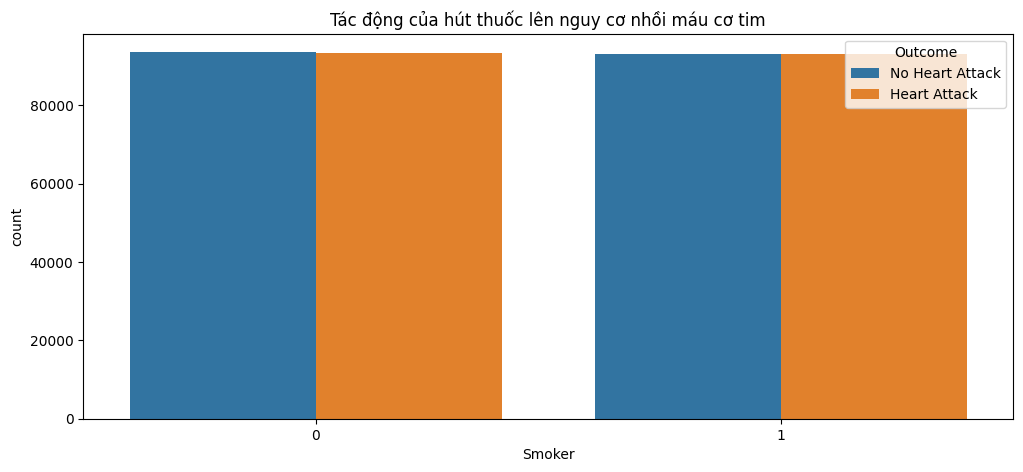

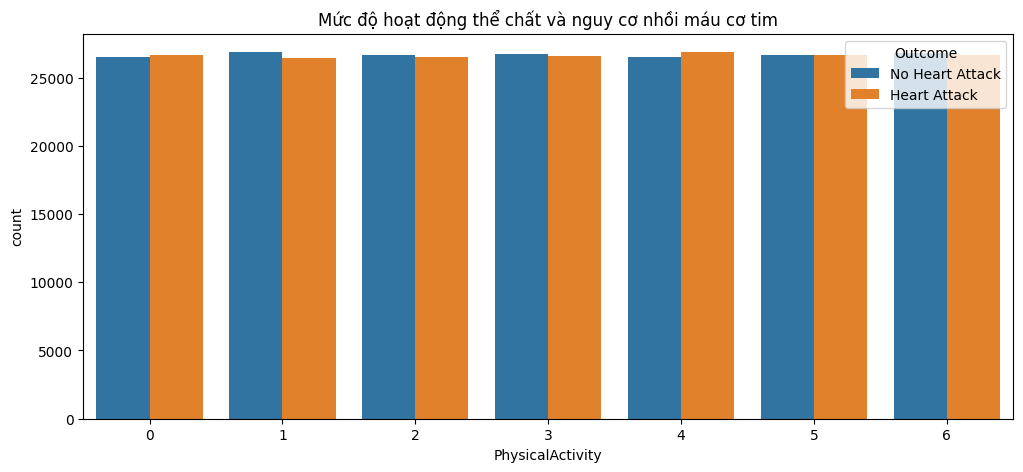

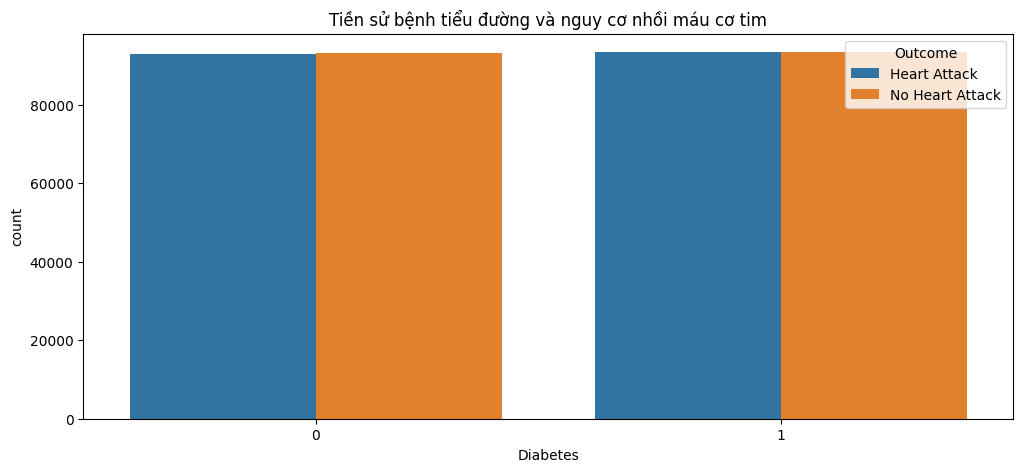

Độ chính xác của mô hình: 0.50
Báo cáo phân loại:
                 precision    recall  f1-score   support

   Heart Attack       0.50      0.64      0.56     37003
No Heart Attack       0.50      0.36      0.42     37592

       accuracy                           0.50     74595
      macro avg       0.50      0.50      0.49     74595
   weighted avg       0.50      0.50      0.49     74595



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Đọc dữ liệu
df = pd.read_csv("heart_attack_dataset.csv")  # Cập nhật đường dẫn đúng
print(df.columns)

# Kiểm tra thông tin dữ liệu
display(df.head())
display(df.info())

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 5))
sns.countplot(x="Smoker", hue="Outcome", data=df)
plt.title("Tác động của hút thuốc lên nguy cơ nhồi máu cơ tim")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x="PhysicalActivity", hue="Outcome", data=df)
plt.title("Mức độ hoạt động thể chất và nguy cơ nhồi máu cơ tim")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x="Diabetes", hue="Outcome", data=df)
plt.title("Tiền sử bệnh tiểu đường và nguy cơ nhồi máu cơ tim")
plt.show()

# Xây dựng mô hình hồi quy logistic
X = df[["Smoker", "PhysicalActivity", "Diabetes"]]
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")
print("Báo cáo phân loại:")
print(report)